In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [47]:
 %cd "/content/drive/MyDrive/FOOD"

/content/drive/MyDrive/FOOD


In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [50]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)


In [52]:
 training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FOOD/Train',target_size = (150,150),batch_size = 32,class_mode ='categorical')

Found 878 images belonging to 10 classes.


In [53]:
class_name = training_set.class_indices
class_name

{'Banhbotloc': 0,
 'Banhcuon': 1,
 'Banhmy': 2,
 'Banhtrung': 3,
 'Banhxeo': 4,
 'Bundaumamtom': 5,
 'Cakhoto': 6,
 'Chaolong': 7,
 'Myquang': 8,
 'Nemchua': 9}

In [54]:
 test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FOOD/Test',target_size = (150,150),batch_size = 32,class_mode = 'categorical')

Found 247 images belonging to 10 classes.


In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [56]:
 history=model.fit(training_set,epochs=50,batch_size=128,verbose=1,validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss',patience=20)])


Epoch 1/50
28/28 [==============================] - 26s 849ms/step - loss: 2.9668 - accuracy: 0.1526 - val_loss: 2.3578 - val_accuracy: 0.1134
Epoch 2/50
28/28 [==============================] - 22s 803ms/step - loss: 1.9276 - accuracy: 0.3349 - val_loss: 2.7425 - val_accuracy: 0.2146
Epoch 3/50
28/28 [==============================] - 23s 823ms/step - loss: 1.7055 - accuracy: 0.4134 - val_loss: 2.5606 - val_accuracy: 0.2186
Epoch 4/50
28/28 [==============================] - 22s 802ms/step - loss: 1.5922 - accuracy: 0.4419 - val_loss: 2.7336 - val_accuracy: 0.1417
Epoch 5/50
28/28 [==============================] - 22s 798ms/step - loss: 1.4292 - accuracy: 0.4954 - val_loss: 2.8924 - val_accuracy: 0.2105
Epoch 6/50
28/28 [==============================] - 22s 801ms/step - loss: 1.2742 - accuracy: 0.5695 - val_loss: 3.1076 - val_accuracy: 0.2186
Epoch 7/50
28/28 [==============================] - 22s 802ms/step - loss: 1.0286 - accuracy: 0.6572 - val_loss: 3.2293 - val_accuracy: 0.2348

Bánh bột lọc


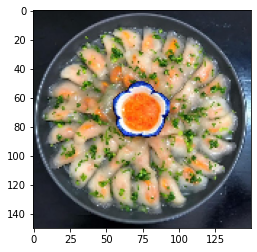

Bánh cuốn


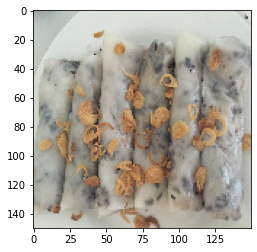

Bánh mỳ


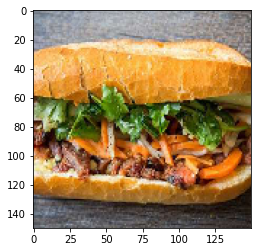

Bún xeo


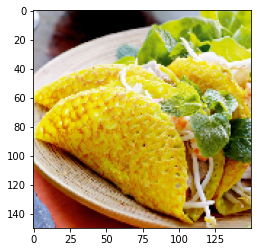

Bánh trưng


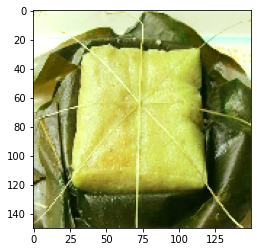

Bún đậu mắm tôm


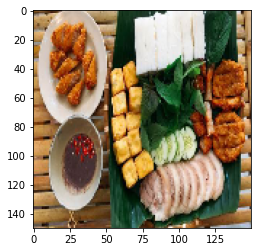

Cháo lòng


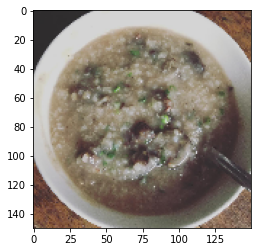

Cá kho tộ


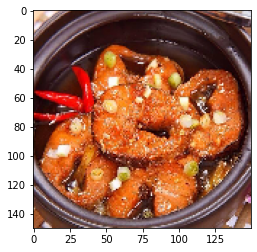

Nem chua


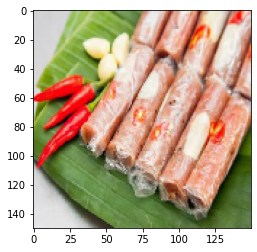

Mì quảng


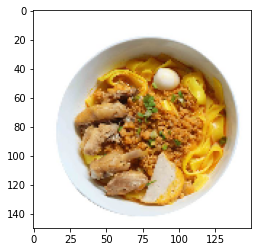

In [67]:
 import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test="/content/drive/MyDrive/Test_model"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Bánh bột lọc'
  if round(result[0][1])==1:
    prediction='Bánh cuốn'
  if round(result[0][2])==1:
    prediction='Bánh mỳ'
  if round(result[0][3])==1:
    prediction='Bánh trưng'
  if round(result[0][4])==1:
    prediction='Bún xeo'
  if round(result[0][5])==1:
    prediction='Bún đậu mắm tôm'
  if round(result[0][6])==1:
    prediction='Cá kho tộ'
  if round(result[0][7])==1:
    prediction='Cháo lòng'
  if round(result[0][8])==1:
    prediction='Mì quảng'
  if round(result[0][9])==1:
    prediction='Nem chua'
  print(prediction)
  plt.show()
